In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer



In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head(10) 

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0


In [4]:
df = df.fillna('')
df['full'] = df['title'] + " " + df['author']

In [5]:
X = df.drop("label", axis = 1)
y = df["label"]

X.shape, y.shape

((20800, 5), (20800,))

In [6]:
messages = X.copy()

In [12]:
def text_cleaning(length):
    WordNet = WordNetLemmatizer()
    corpus = []
    for i in range(length):
        m = re.sub("[^a-zA-Z]"," ",messages["full"][i])
        m = m.lower()
        m = m.split()
        m = [WordNet.lemmatize(word) for word in m if not word in stopwords.words('english')]
        clean_text = " ".join(m)
        corpus.append(clean_text)
        
    return corpus

In [14]:

clean_text_corpus = text_cleaning(len(messages))

In [17]:
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(clean_text_corpus).toarray()

In [18]:
X.shape, y.shape

((20800, 5000), (20800,))

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [20]:
tfidf_v.get_feature_names()[:20]

['aaron',
 'aaron carroll',
 'aaron kesel',
 'aaron klein',
 'abandon',
 'abby',
 'abby goodnough',
 'abc',
 'abedin',
 'abelson',
 'abortion',
 'abrams',
 'absolutely',
 'abuse',
 'accept',
 'access',
 'access pipeline',
 'accidentally',
 'account',
 'accusation']

In [21]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [22]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [23]:
from sklearn import metrics
import numpy as np
import itertools

Confusion matrix, without normalization


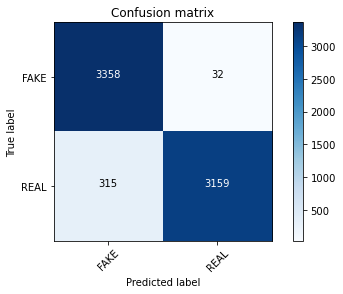

In [25]:
classifier.fit(X_train,y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes= ["FAKE","REAL"])


In [26]:
print("accuracy:   %0.3f" % score)

accuracy:   0.949
